In [102]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from imblearn.over_sampling import SMOTE


In [103]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep=',')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [104]:
df['Gender'] = df['Gender'].astype("category").cat.codes.values
df['Occupation'] = df['Occupation'].astype("category").cat.codes.values
df['BMI Category'] = df['BMI Category'].astype("category").cat.codes.values
df['Blood Pressure'] = df['Blood Pressure'].astype("category").cat.codes.values


In [105]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('sem disturbio')
classes = df['Sleep Disorder'].unique()
#print(classes)

In [106]:
X = df.iloc[:, 1:12].values 
y = df['Sleep Disorder'].values

#print(X)
#print(y)

In [107]:
sm = SMOTE(random_state=42,k_neighbors=5)
dataset_res, ouput_label= sm.fit_resample(X,y)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(dataset_res, ouput_label, test_size=0.2)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [109]:
model = tf.keras.models.load_model('model_final.h5')

In [110]:
output_model_ = np.argmax(model.predict(X_test_std), axis=-1)
y_test_class = np.argmax(y_test_onehot, axis=-1)

5/5 [==============================] - 0s 2ms/step


In [111]:
historico = pd.read_csv('Historico.csv')

print(historico.head())

   Unnamed: 0      loss       mse  val_loss   val_mse
0           0  1.056022  0.212302  0.871185  0.170681
1           1  0.788455  0.149405  0.564936  0.097750
2           2  0.582247  0.103087  0.403016  0.061602
3           3  0.531104  0.089534  0.386258  0.056706
4           4  0.495754  0.082598  0.372728  0.055337


In [116]:
loss = historico['loss']
val_loss = historico['val_loss']  



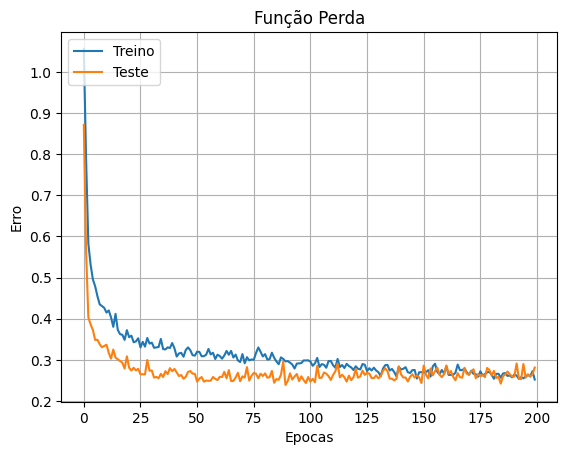

In [117]:
plt.plot(loss)
plt.plot(val_loss)
#plt.yscale("log")
plt.title('Função Perda')
plt.ylabel('Erro')
plt.xlabel('Epocas')
plt.legend(['Treino','Teste'], loc='upper left')
plt.grid()
plt.show()

In [114]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Acurácia:', accuracy_score(y_test_class, output_model_))
print('Precisão:', precision_score(y_test_class, output_model_, average='macro'))
print('Sensibilidade:', recall_score(y_test_class, output_model_, average='macro'))
print('F1-Score:', f1_score(y_test_class, output_model_, average='macro'))

Acurácia: 0.9545454545454546
Precisão: 0.9511347397485892
Sensibilidade: 0.9518831499963575
F1-Score: 0.9514081483165366


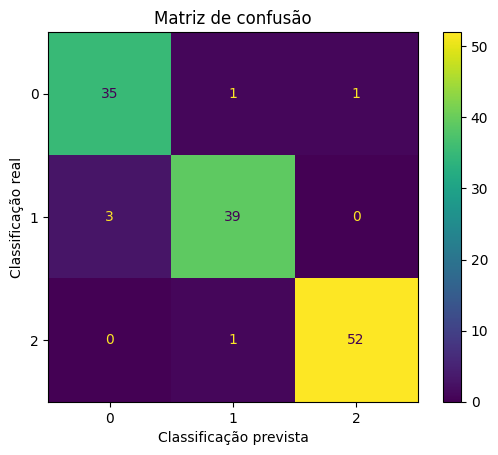

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_class, output_model_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Matriz de confusão')
disp.ax_.set_xlabel('Classificação prevista')
disp.ax_.set_ylabel('Classificação real')
plt.show()
